# DECISION INTELLIGENCE 

### 1.1 Providng the path to access src folder

In [1]:
import sys
# allowing notebook to access src/
sys.path.append("../src")

### 1.2 IMPORT LIBRARIES AND MODULES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from utils import load_csv
from demand_forecasting import DemandForecaster
from spatial_analysis import SpatialAnalyzer
from decision_engine import DecisionEngine

### 1.3 Initializing the chart size

In [4]:
#Make all charts readable by default
plt.rcParams["figure.figsize"] = (10, 5)

### 1.4 Loading the Datasets

In [5]:
charging_df = pd.read_csv("../data/processed/temporal_forecast_result.csv")
spatial_df = pd.read_csv("../data/processed/ev_spatial_preprocessed.csv.gz",compression="gzip")

print("Charging data shape:", charging_df.shape)
print("Spatial data shape:", spatial_df.shape)

Charging data shape: (1320, 49)
Spatial data shape: (177866, 99)


### 2.1 Creating charging demand intelligence

In [6]:
forecaster = DemandForecaster(charging_df)
demand_df = forecaster.compute_demand_index()

demand_df[["energy_consumed_(kwh)","charging_duration_(hours)","demand_index"]].head()


,energy_consumed_(kwh),charging_duration_(hours),demand_index
0,0.827415,-1.582085,-0.754670
1,-1.387924,0.814865,-0.573059
2,-1.076981,0.172798,-0.904183
3,1.685900,-0.945610,0.740290
4,-1.054072,-0.235342,-1.289415


### 2.2 Peak charging hour in a day

In [7]:
peak_hours = forecaster.peak_charging_hour()
peak_hours.head()

,start_hour,avg_energy_kwh
0,18,0.319970
1,21,0.308732
2,23,0.162266
3,3,0.105211
4,22,0.095480


### 2.3 Visualizing Peak charging time

 At which hours do EVs consume more energy on average

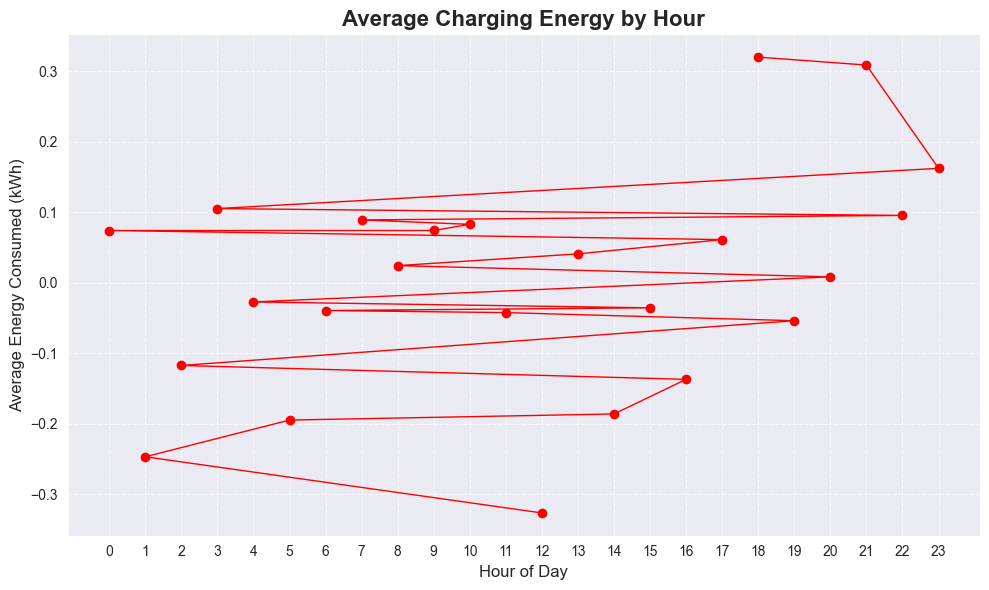

In [8]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid") 
plt.plot(
    peak_hours["start_hour"],       
    peak_hours["avg_energy_kwh"],   
    marker="o",                     
    color="red",                
    linewidth=1,                    
    markersize=6                    
)


plt.title("Average Charging Energy by Hour", fontsize=16, weight='bold')
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Average Energy Consumed (kWh)", fontsize=12)


plt.grid(True, linestyle='--', alpha=0.7) 
plt.xticks(range(0, 24))                  
plt.tight_layout()
plt.show()


### 3.1 Spatial EV Analysis adoption

In [9]:
spatial_analyzer = SpatialAnalyzer(spatial_df)
city_ev_df = spatial_analyzer.ev_count_by_city()
city_ev_df.head(10)

,city,ev_count
208,2.185227,29447
207,0.158799,8931
206,-0.083491,6478
205,-0.111641,6193
204,-0.144236,5863
203,-0.193722,5362
202,-0.201821,5280
201,-0.231453,4980
200,-0.298717,4299
199,-0.355710,3722


### 3.2 Visualizing top Ev cities

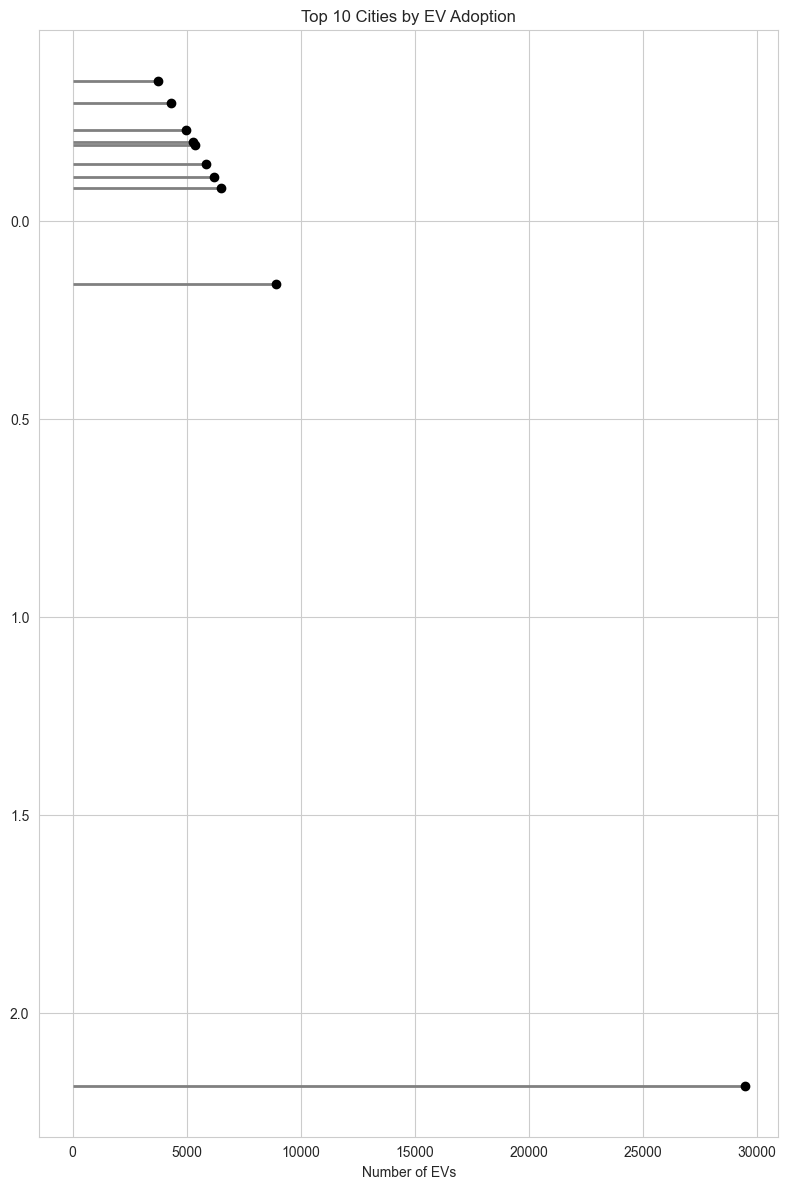

In [10]:
top_cities = city_ev_df.head(10)

sns.set_style("whitegrid")
plt.figure(figsize=(8, 12))

# Draw lines
plt.hlines(
    y=top_cities["city"],
    xmin=0,
    xmax=top_cities["ev_count"],
    color="grey",
    linewidth=2
)

# Draw dots
plt.plot(
    top_cities["ev_count"],
    top_cities["city"],
    "o",
    color="black"
)

plt.xlabel("Number of EVs")
plt.title("Top 10 Cities by EV Adoption")
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

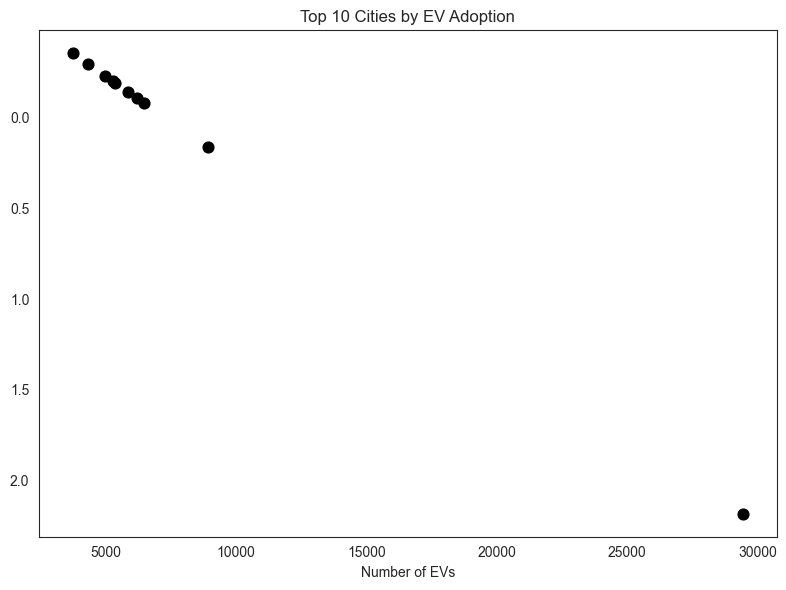

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

top_cities = city_ev_df.head(10)

sns.set_style("white")
plt.figure(figsize=(8, 6))

plt.scatter(
    top_cities["ev_count"],
    top_cities["city"],
    color="black",
    s=60
)

plt.xlabel("Number of EVs")
plt.title("Top 10 Cities by EV Adoption")
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


### 4.1 Initializing Decision Engine

In [12]:
engine = DecisionEngine(demand_df=demand_df,city_ev_df=city_ev_df)

### 4.2 High risk cities for charging cogesion

In [13]:
high_risk = engine.high_risk_cities(top_n=5)
high_risk

,city,ev_count
208,2.185227,29447
207,0.158799,8931
206,-0.083491,6478
205,-0.111641,6193
204,-0.144236,5863


### 4.3 Infrastructure Recommendation

In [14]:
engine.infrastructure_recommendation()

'Moderate demand: expand standard public chargers.'

### 4.4 Policy Recommendation (during specific charging time as it is the peak time )

In [15]:
engine.policy_recommendation()

'Peak charging demand occurs around hour 18. Introduce time-based incentives.'

### 4.5 Demand Index

In [16]:
simulated_df = demand_df.copy()
simulated_df["simulated_demand"] = simulated_df["demand_index"] * 1.2

simulated_df[["demand_index", "simulated_demand"]].head()

,demand_index,simulated_demand
0,-0.754670,-0.905604
1,-0.573059,-0.687671
2,-0.904183,-1.085020
3,0.740290,0.888349
4,-1.289415,-1.547298


### 4.6 Charging Demand :  Current Vs Future Scenario

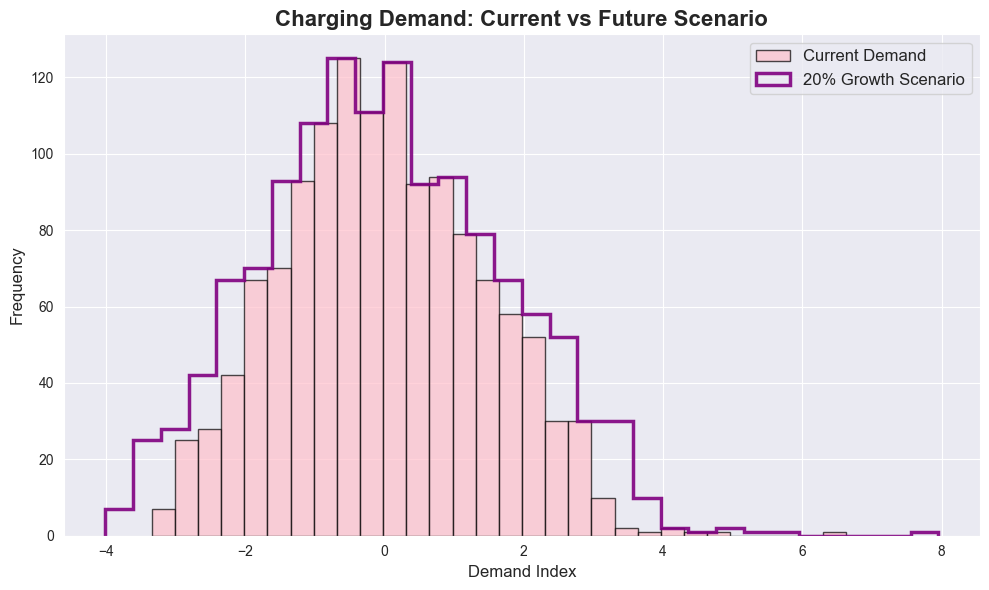

In [20]:
# Plot: Charging Demand Comparison

plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")

# Defining common bins for fair comparison
bins = 30

# Current Demand (filled)
plt.hist(
    demand_df["demand_index"],
    bins=bins,
    alpha=0.7,
    label="Current Demand",
    color="pink",
    edgecolor="black"
)

# Future Demand (outlined to avoid overlap issue)
plt.hist(
    simulated_df["simulated_demand"],
    bins=bins,
    alpha=0.9,
    label="20% Growth Scenario",
    histtype="step", 
    linewidth=2.5,
    color="purple"
)

plt.title("Charging Demand: Current vs Future Scenario", fontsize=16, weight="bold")
plt.xlabel("Demand Index", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(fontsize=12)

# Displaying Plot

plt.tight_layout()
plt.show()


### 4.7 Summary

In [21]:
summary = {
    "Peak Charging Hour": peak_hours.iloc[0]["start_hour"],
    "Top Risk City": high_risk.iloc[0]["city"],
    "Infrastructure Action": engine.infrastructure_recommendation(),
    "Policy Action": engine.policy_recommendation()
}

summary

{'Peak Charging Hour': np.float64(18.0),
 'Top Risk City': np.float64(2.1852272786187696),
 'Infrastructure Action': 'Moderate demand: expand standard public chargers.',
 'Policy Action': 'Peak charging demand occurs around hour 18. Introduce time-based incentives.'}